##**Task 1: Machine Learning - Clustering**
**Task: Use any clustering technique to extract patterns or segregate data into groups.**

**User Story: User should be able to provide a data point (a row) and program should be able to identify to which cluster given data point belongs to and why?**

**Deploy using Streamlit**

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('/content/test.xlsx')
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57


In [3]:
from sklearn.cluster import KMeans

# Initialize and fit KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

# Predict the clusters for the test data
clusters = kmeans.predict(data)

clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 1, 2, 1], dtype=int32)

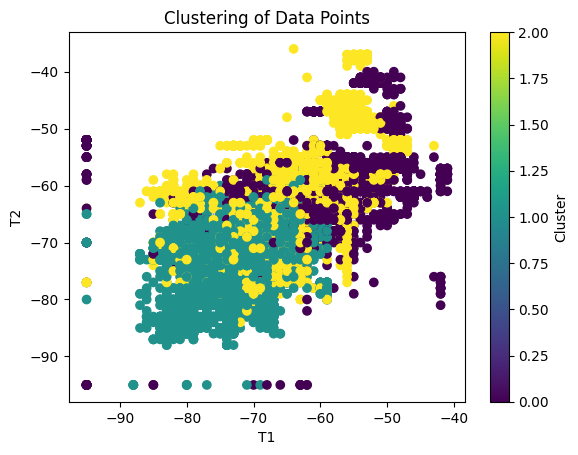

In [4]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.scatter(data['T1'], data['T2'], c=clusters, cmap='viridis')
plt.xlabel('T1')
plt.ylabel('T2')
plt.title('Clustering of Data Points')
plt.colorbar(label='Cluster')
plt.show()

In [5]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [6]:
%%writefile app.py

import streamlit as st
import pandas as pd
from sklearn.cluster import KMeans

# Load your data
data = pd.read_excel('/content/test.xlsx')  # Update 'your_data.csv' with the path to your dataset

# Initialize and fit KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

# Streamlit App
st.title('Data Clustering App')

# Sidebar for user input
st.sidebar.title('User Input')
user_input = {}
for feature in data.columns:
    user_input[feature] = st.sidebar.number_input(f'Enter {feature}', value=0.0)

# Predict the cluster for the user input
user_data = pd.DataFrame([user_input])
cluster_prediction = kmeans.predict(user_data)

# Display the predicted cluster
st.write(f'The given data point belongs to Cluster {cluster_prediction[0]}.')

# Explain the cluster assignment
st.subheader('Cluster Explanation')
cluster_center = kmeans.cluster_centers_[cluster_prediction[0]]
st.write(f'The cluster center for Cluster {cluster_prediction[0]} is:')
st.write(cluster_center)

# Further analysis or visualization can be added here based on the cluster assignment


Writing app.py


In [7]:
!wget -q -O - ipv4.icanhazip.com

34.139.121.76


In [9]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.121.76:8501

npx: installed 22 in 2.845s
your url is: https://heavy-hats-sip.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/loca